In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the test data
test_data = pd.read_csv('test.csv')
print("Number of rows and columns in test_data:", test_data.shape)
print(test_data.head())

# Read the label data
label_data = pd.read_csv('test_label.csv')
print("Number of rows and columns in test_data:", label_data.shape)
print(label_data.head())


Number of rows and columns in test_data: (70001, 38)
     0         1         2         3    4         5         6    7         8  \
0  0.0  0.000340  0.000432  0.000000  0.0  0.694290  0.038316  0.0  0.000000   
1  0.0  0.000510  0.000576  0.000000  0.0  0.694702  0.038856  0.0  0.427536   
2  0.0  0.000510  0.000576  0.000000  0.0  0.694908  0.038856  0.0  0.000000   
3  0.0  0.000170  0.000432  0.000000  0.0  0.695114  0.038856  0.0  0.007246   
4  0.0  0.000935  0.000720  0.000336  0.0  0.695733  0.039935  0.0  0.000000   

     9  ...   28    29        30        31   32        33        34        35  \
0  0.0  ...  0.0  0.50  0.036442  0.000000  0.0  0.023256  0.055147  0.055147   
1  0.0  ...  0.0  0.25  0.025862  0.000000  0.0  0.028623  0.040441  0.040441   
2  0.0  ...  0.0  0.25  0.307994  0.013699  0.0  0.026834  0.183824  0.180147   
3  0.0  ...  0.0  0.25  0.026254  0.000000  0.0  0.030411  0.047794  0.047794   
4  0.0  ...  0.0  0.25  0.014107  0.000000  0.0  0.028623  0.

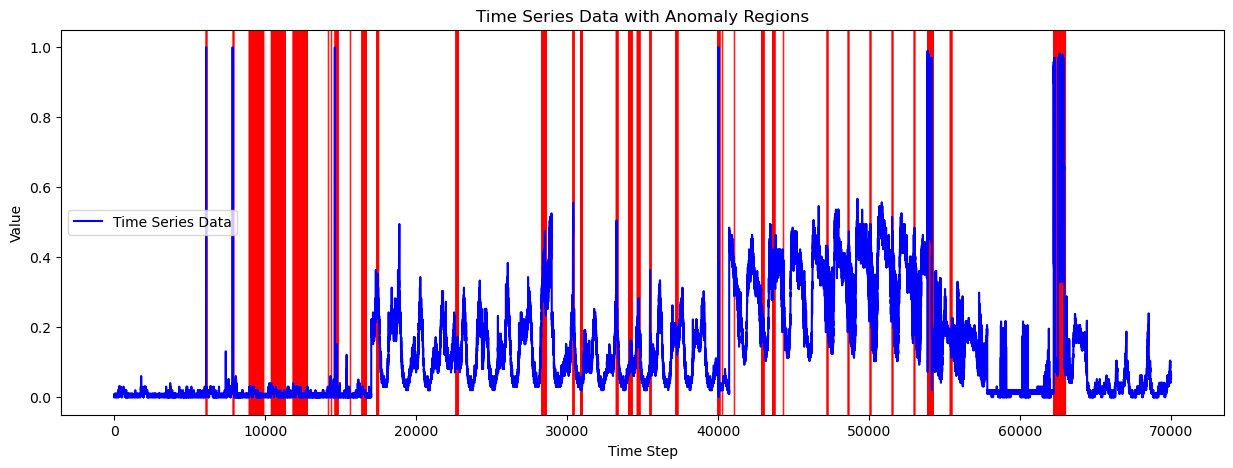

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('test.csv', header=None)
labels = pd.read_csv('test_label.csv', header=None)

# Plot the time series data
plt.figure(figsize=(15, 5))
plt.plot(data.index, data[0], label='Time Series Data', color='blue')

# Highlight anomaly regions
anomalies = labels[labels[0] == 1].index
for anomaly in anomalies:
    plt.axvspan(anomaly, anomaly+1, color='red', alpha=0.5)

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Time Series Data with Anomaly Regions')
plt.legend()
plt.show()


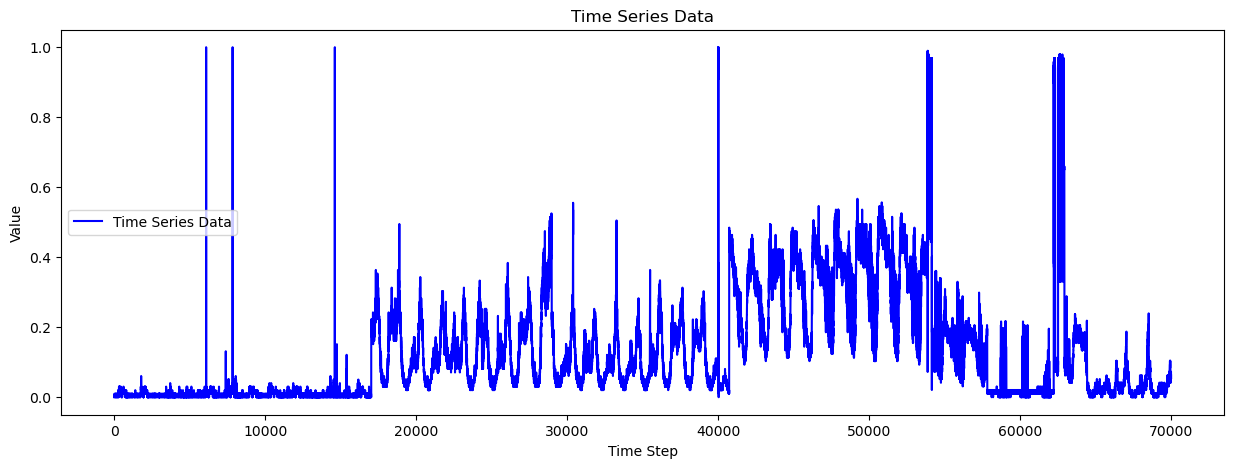

In [28]:
# Visualize the time series data
plt.figure(figsize=(15, 5))
plt.plot(data.index, data[0], label='Time Series Data', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [29]:
# Analyze anomalies
anomaly_indices = labels[labels[0] == 1].index
anomaly_values = data.iloc[anomaly_indices]

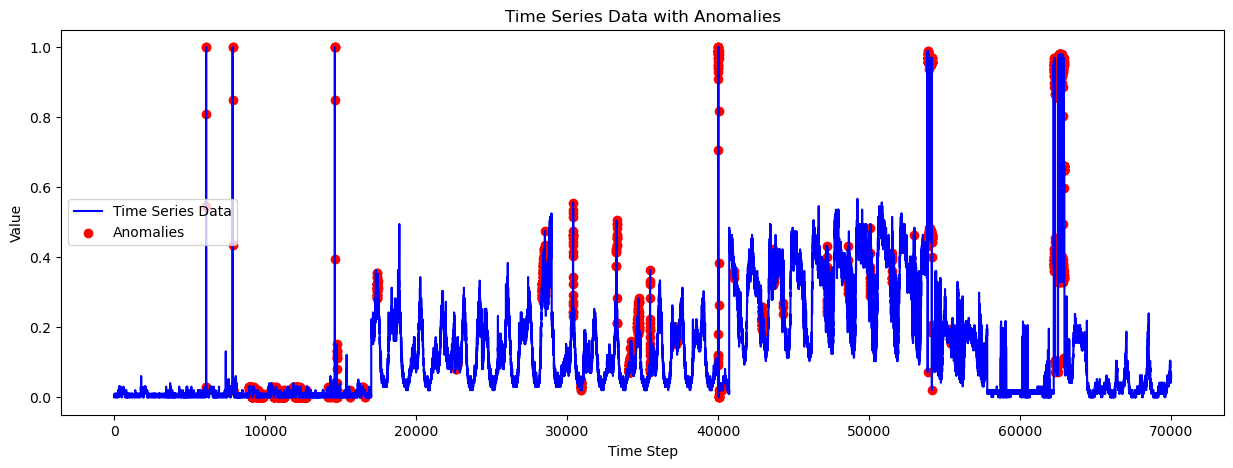

In [30]:
# Visualize anomalies
plt.figure(figsize=(15, 5))
plt.plot(data.index, data[0], label='Time Series Data', color='blue')
plt.scatter(anomaly_indices, anomaly_values[0], color='red', label='Anomalies')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Time Series Data with Anomalies')
plt.legend()
plt.show()

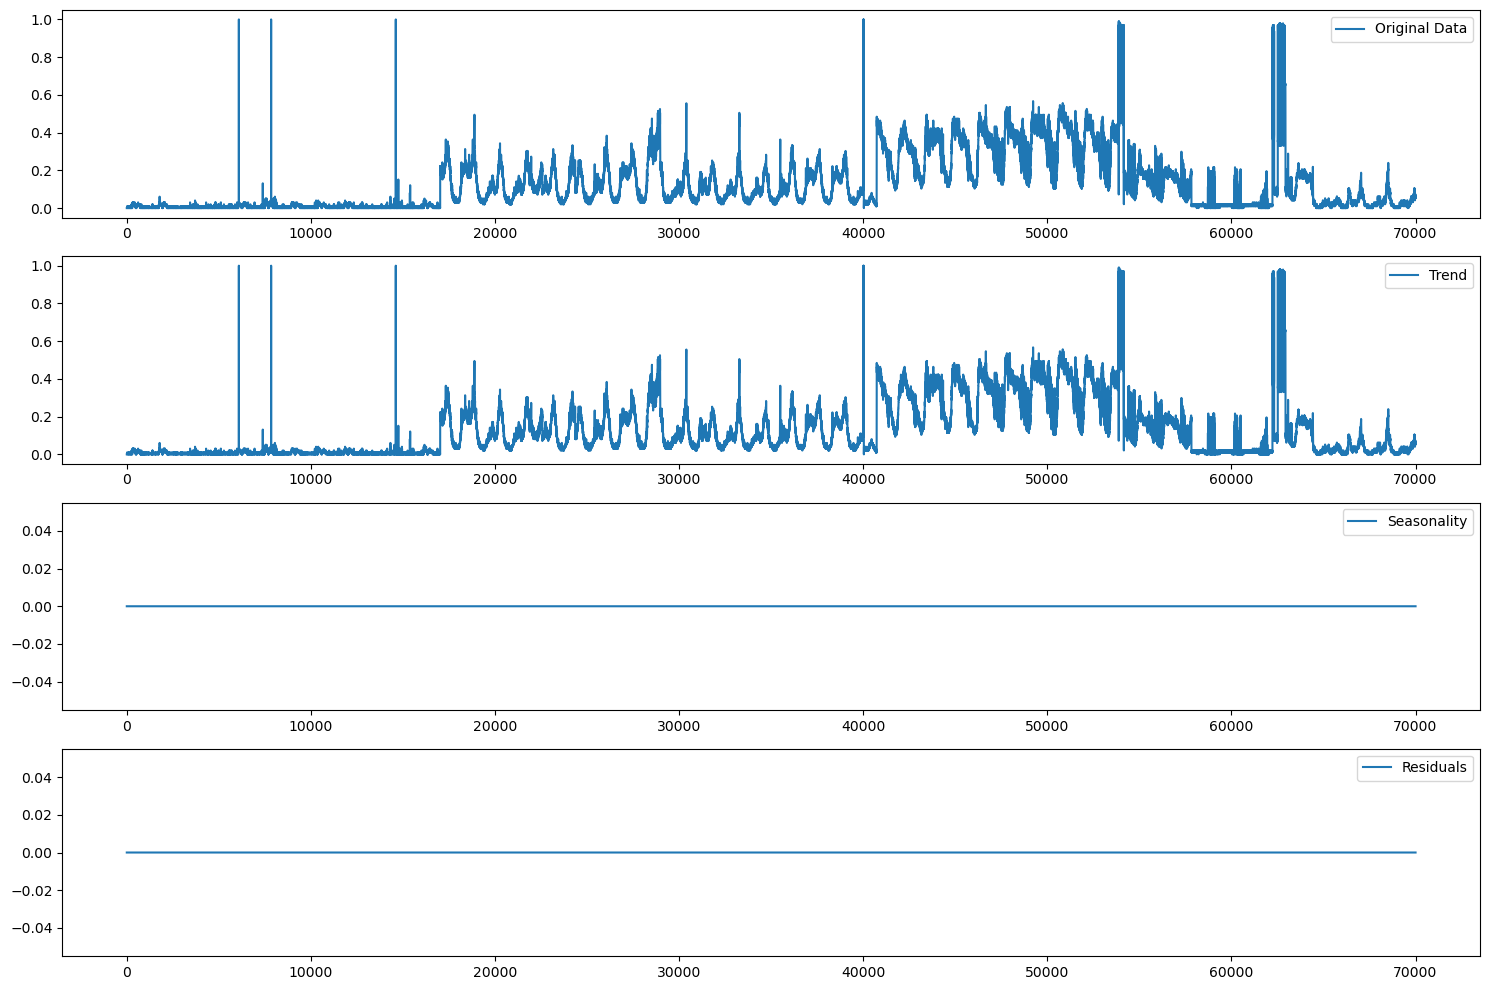

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
result = seasonal_decompose(data[0], model='additive', period=1)  # Assuming non-seasonal data

# Plot the decomposition
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(data.index, data[0], label='Original Data')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data.index, result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data.index, result.seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data.index, result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

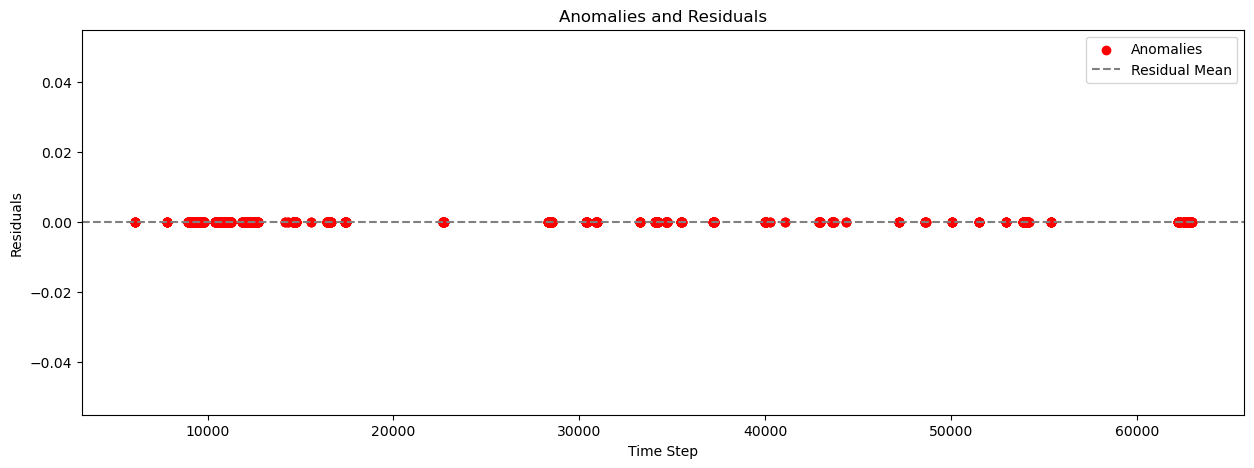

In [32]:
# Analyze anomalies and residuals
anomaly_indices = labels[labels[0] == 1].index
anomaly_residuals = result.resid[anomaly_indices]

# Plot anomalies and residuals
plt.figure(figsize=(15, 5))
plt.scatter(anomaly_indices, anomaly_residuals, color='red', label='Anomalies')
plt.axhline(y=0, color='gray', linestyle='--', label='Residual Mean')
plt.xlabel('Time Step')
plt.ylabel('Residuals')
plt.title('Anomalies and Residuals')
plt.legend()
plt.show()